Codigo utilizado para ejecutar las guias 2 y 3 usando el nuevo conjunto de datos.

Preparación del entorno

In [ ]:
# Import things like usual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Obtencion de los datos

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                             ])
# Download and load the training data
trainset = datasets.CIFAR10('CIFAR10_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.CIFAR10('CIFAR10_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 170M/170M [00:04<00:00, 37.3MB/s]


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

Clasificacion de vistas

In [ ]:
def view_classify(img_flat, ps):
    ''' Function for viewing an image and it's predicted classes.
        img_flat tensor image 1d 3072 elements
        ps the tensor of probabilities
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    img_3d = img_flat.view(3, 32, 32)
    img_show = img_3d.numpy().transpose(1, 2, 0)
    img_show = img_show * 0.5 + 0.5
    ax1.imshow(img_show)
    ax1.axis('off')

    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    y_pos = np.arange(len(class_labels))

    ax2.barh(y_pos, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(class_labels)
    ax2.set_title('Class Probability (CIFAR-10)')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

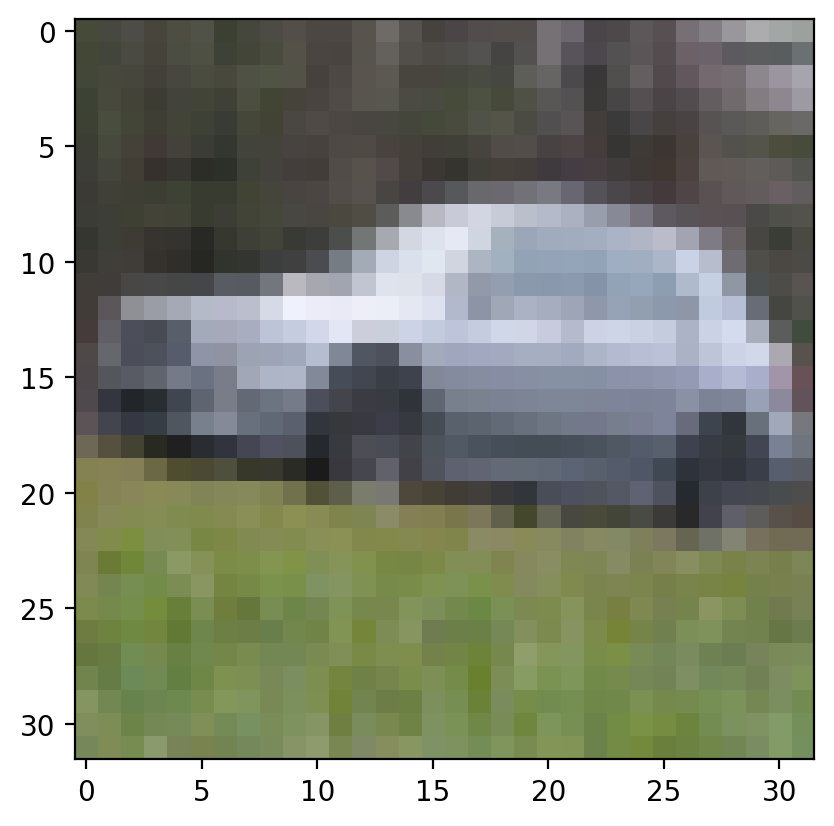

In [ ]:
# Unnormalize the image
img_original = images.view(-1, 3, 32, 32)[1]
img_numpy = img_original.numpy().transpose(1, 2, 0)

img_numpy = img_numpy * 0.5 + 0.5
plt.imshow(img_numpy);

Construyendo la red neuronal

In [ ]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each (3*32*32)
        self.fc1 = nn.Linear(3072, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 class - (avion, coche, pajaro, etc)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Initializing weights and biases

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0115, -0.0089, -0.0119,  ..., -0.0149,  0.0172,  0.0036],
        [-0.0088, -0.0074,  0.0161,  ...,  0.0073, -0.0008,  0.0072],
        [ 0.0069, -0.0046,  0.0015,  ...,  0.0156,  0.0073, -0.0005],
        ...,
        [-0.0138, -0.0177,  0.0049,  ..., -0.0148,  0.0060, -0.0040],
        [-0.0090, -0.0048, -0.0012,  ...,  0.0158,  0.0142, -0.0144],
        [-0.0156,  0.0178,  0.0147,  ...,  0.0107, -0.0041, -0.0087]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0157,  0.0131,  0.0045, -0.0021,  0.0081, -0.0111,  0.0118,  0.0047,
         0.0106,  0.0024,  0.0127,  0.0030, -0.0013, -0.0042,  0.0101,  0.0109,
         0.0150,  0.0069, -0.0146,  0.0105,  0.0167, -0.0008, -0.0086, -0.0017,
         0.0077, -0.0031,  0.0018, -0.0119,  0.0115, -0.0147,  0.0103, -0.0118,
         0.0154,  0.0144, -0.0069, -0.0047,  0.0120, -0.0077,  0.0092, -0.0060,
        -0.0176, -0.0048,  0.0036,  0.0021, -0.0171, -0.0012,  0.0096,  0.0127,
        -0.0129

For custom initialization

In [ ]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0191, -0.0015,  0.0049,  ..., -0.0043, -0.0011, -0.0055],
        [ 0.0016,  0.0140,  0.0028,  ..., -0.0130,  0.0059,  0.0061],
        [-0.0126, -0.0045,  0.0195,  ...,  0.0049, -0.0005, -0.0018],
        ...,
        [ 0.0018,  0.0042,  0.0148,  ..., -0.0205,  0.0149, -0.0081],
        [ 0.0054,  0.0064, -0.0009,  ...,  0.0165,  0.0035, -0.0030],
        [-0.0021,  0.0171, -0.0031,  ..., -0.0144, -0.0046, -0.0043]])

Forward pass


Now that we have a network, let's see what happens when we pass in an image. This is called the forward pass. We're going to convert the image data into a tensor, then pass it through the operations defined by the network architecture.

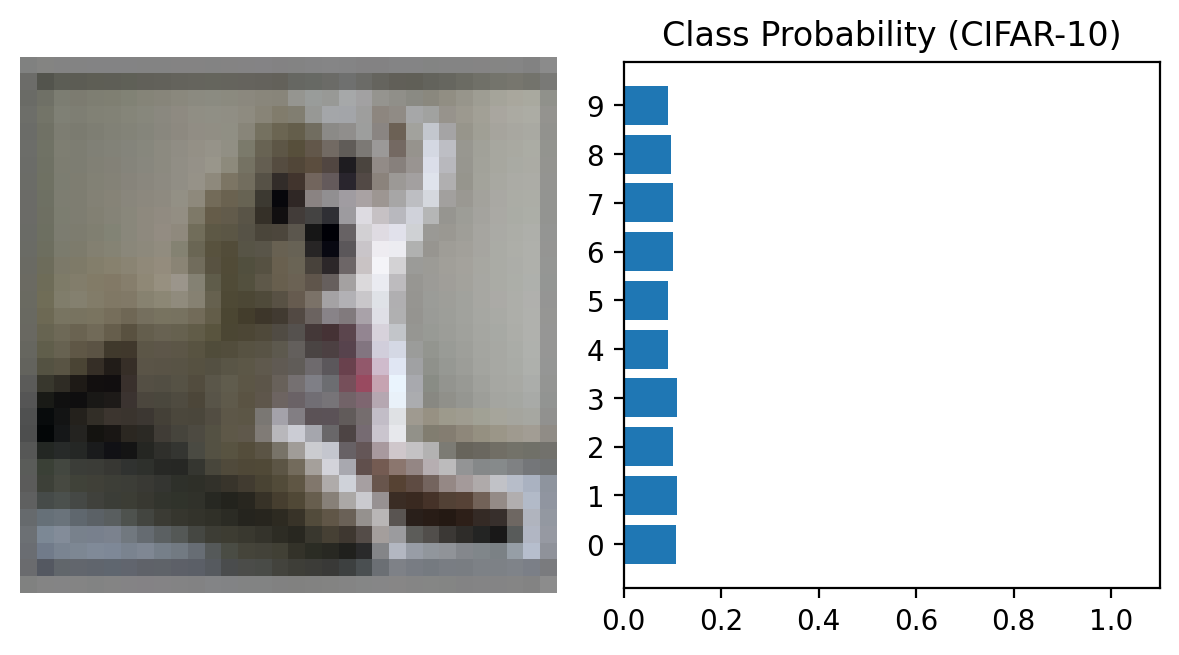

In [ ]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images (3, 32, 32) into a 1D vector from 3072
# view() to PyTorch get the size of the image
images = images.view(images.shape[0], -1) #Now the shape is (64, 3072)
# or images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Forward pass through the network for the entire batch
output = model.forward(images)

# Select a single image and its corresponding output for visualization
img_idx = 0
img = images[img_idx,:]
ps = output[img_idx,:]

view_classify(img, ps)

In [ ]:
#Define loss function
criterion = nn.CrossEntropyLoss()
#Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

Forward pass cicle, loss function, backward pass and actualization of weights

In [ ]:
print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()

Initial weights -  Parameter containing:
tensor([[ 0.0191, -0.0015,  0.0049,  ..., -0.0043, -0.0011, -0.0055],
        [ 0.0016,  0.0140,  0.0028,  ..., -0.0130,  0.0059,  0.0061],
        [-0.0126, -0.0045,  0.0195,  ...,  0.0049, -0.0005, -0.0018],
        ...,
        [ 0.0018,  0.0042,  0.0148,  ..., -0.0205,  0.0149, -0.0081],
        [ 0.0054,  0.0064, -0.0009,  ...,  0.0165,  0.0035, -0.0030],
        [-0.0021,  0.0171, -0.0031,  ..., -0.0144, -0.0046, -0.0043]],
       requires_grad=True)
Gradient - tensor([[ 3.0904e-05,  7.4729e-06,  1.5170e-05,  ..., -8.9839e-05,
         -9.2475e-05, -8.5675e-05],
        [-8.2442e-05, -4.6603e-05, -3.1622e-05,  ..., -7.7047e-05,
         -9.0264e-05, -1.0081e-04],
        [ 3.9764e-05,  2.9600e-05,  3.4441e-05,  ...,  6.9137e-05,
          7.8167e-05,  9.8205e-05],
        ...,
        [ 4.2811e-05,  4.7529e-05,  2.7359e-05,  ..., -1.2875e-05,
         -4.8230e-06, -1.3726e-05],
        [ 1.0726e-04,  7.3528e-05,  5.1869e-05,  ...,  5.1094e

In [ ]:
print('Updated weights - ', model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[ 0.0191, -0.0015,  0.0049,  ..., -0.0043, -0.0011, -0.0055],
        [ 0.0016,  0.0140,  0.0028,  ..., -0.0130,  0.0059,  0.0061],
        [-0.0126, -0.0045,  0.0195,  ...,  0.0049, -0.0005, -0.0018],
        ...,
        [ 0.0018,  0.0042,  0.0148,  ..., -0.0205,  0.0149, -0.0081],
        [ 0.0054,  0.0064, -0.0009,  ...,  0.0165,  0.0035, -0.0030],
        [-0.0021,  0.0171, -0.0031,  ..., -0.0144, -0.0046, -0.0043]],
       requires_grad=True)


Training real

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [ ]:
epochs = 40
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten image from batch, 3, 32, 32 to batch, 3072
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))

            running_loss = 0

Epoch: 1/40...  Loss: 2.1255
Epoch: 1/40...  Loss: 2.1354
Epoch: 1/40...  Loss: 2.1275
Epoch: 1/40...  Loss: 2.1399
Epoch: 1/40...  Loss: 2.1437
Epoch: 1/40...  Loss: 2.1279
Epoch: 1/40...  Loss: 2.1409
Epoch: 1/40...  Loss: 2.1278
Epoch: 1/40...  Loss: 2.1268
Epoch: 1/40...  Loss: 2.1307
Epoch: 1/40...  Loss: 2.1333
Epoch: 1/40...  Loss: 2.1366
Epoch: 1/40...  Loss: 2.1236
Epoch: 1/40...  Loss: 2.1429
Epoch: 1/40...  Loss: 2.1273
Epoch: 1/40...  Loss: 2.1274
Epoch: 1/40...  Loss: 2.1386
Epoch: 1/40...  Loss: 2.1283
Epoch: 1/40...  Loss: 2.1306
Epoch: 2/40...  Loss: 0.9571
Epoch: 2/40...  Loss: 2.1442
Epoch: 2/40...  Loss: 2.1328
Epoch: 2/40...  Loss: 2.1322
Epoch: 2/40...  Loss: 2.1228
Epoch: 2/40...  Loss: 2.1313
Epoch: 2/40...  Loss: 2.1343
Epoch: 2/40...  Loss: 2.1350
Epoch: 2/40...  Loss: 2.1192
Epoch: 2/40...  Loss: 2.1241
Epoch: 2/40...  Loss: 2.1300
Epoch: 2/40...  Loss: 2.1283
Epoch: 2/40...  Loss: 2.1142
Epoch: 2/40...  Loss: 2.1200
Epoch: 2/40...  Loss: 2.1256
Epoch: 2/40...

Running test to prube the predictions

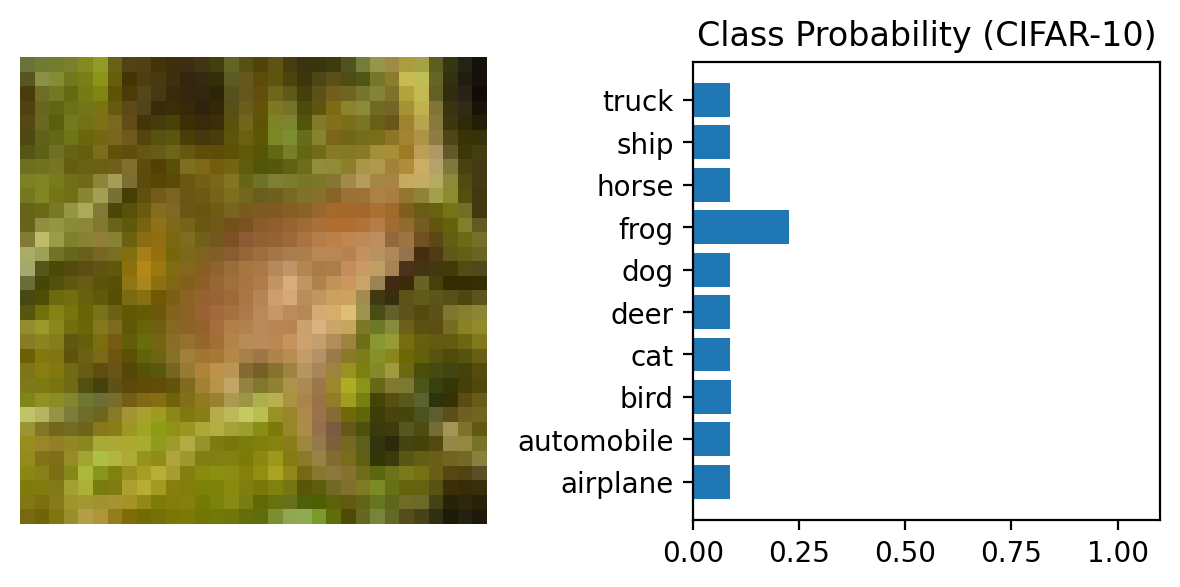

In [ ]:
images, labels = next(iter(trainloader))

img_flat = images[0].view(1, 3072)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img_flat)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img_flat, ps)